Question 1

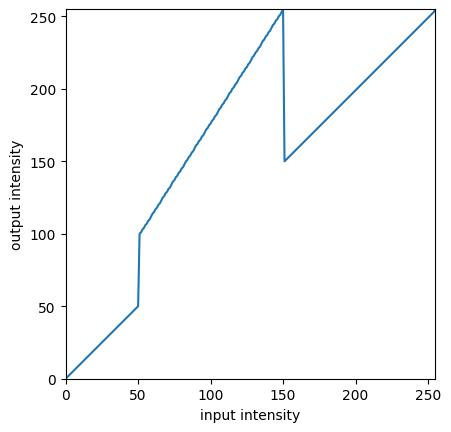

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(50,50),(51,100),(150,255),(151,150),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.a white matter


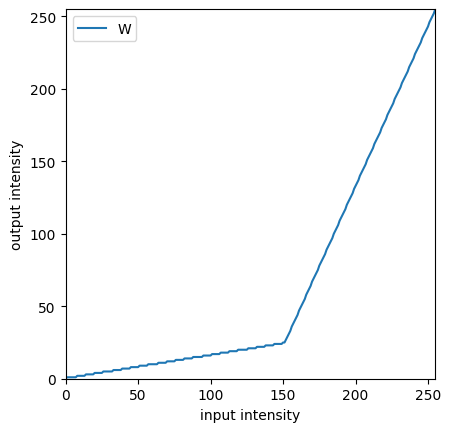

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(150,25),(151,25),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('White matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('White matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('White matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.b Gray matter enhanced

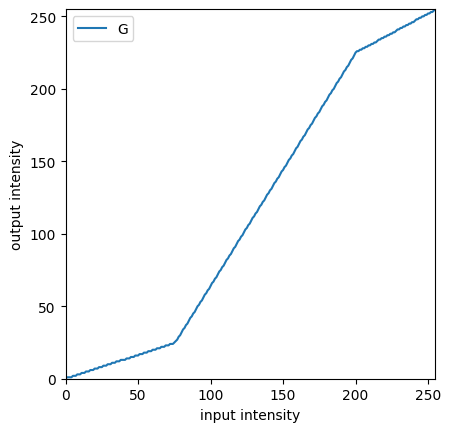

In [52]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(75,25),(76,26),(200,225),(201,226),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('Gray matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Gray matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('Gray matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 3 

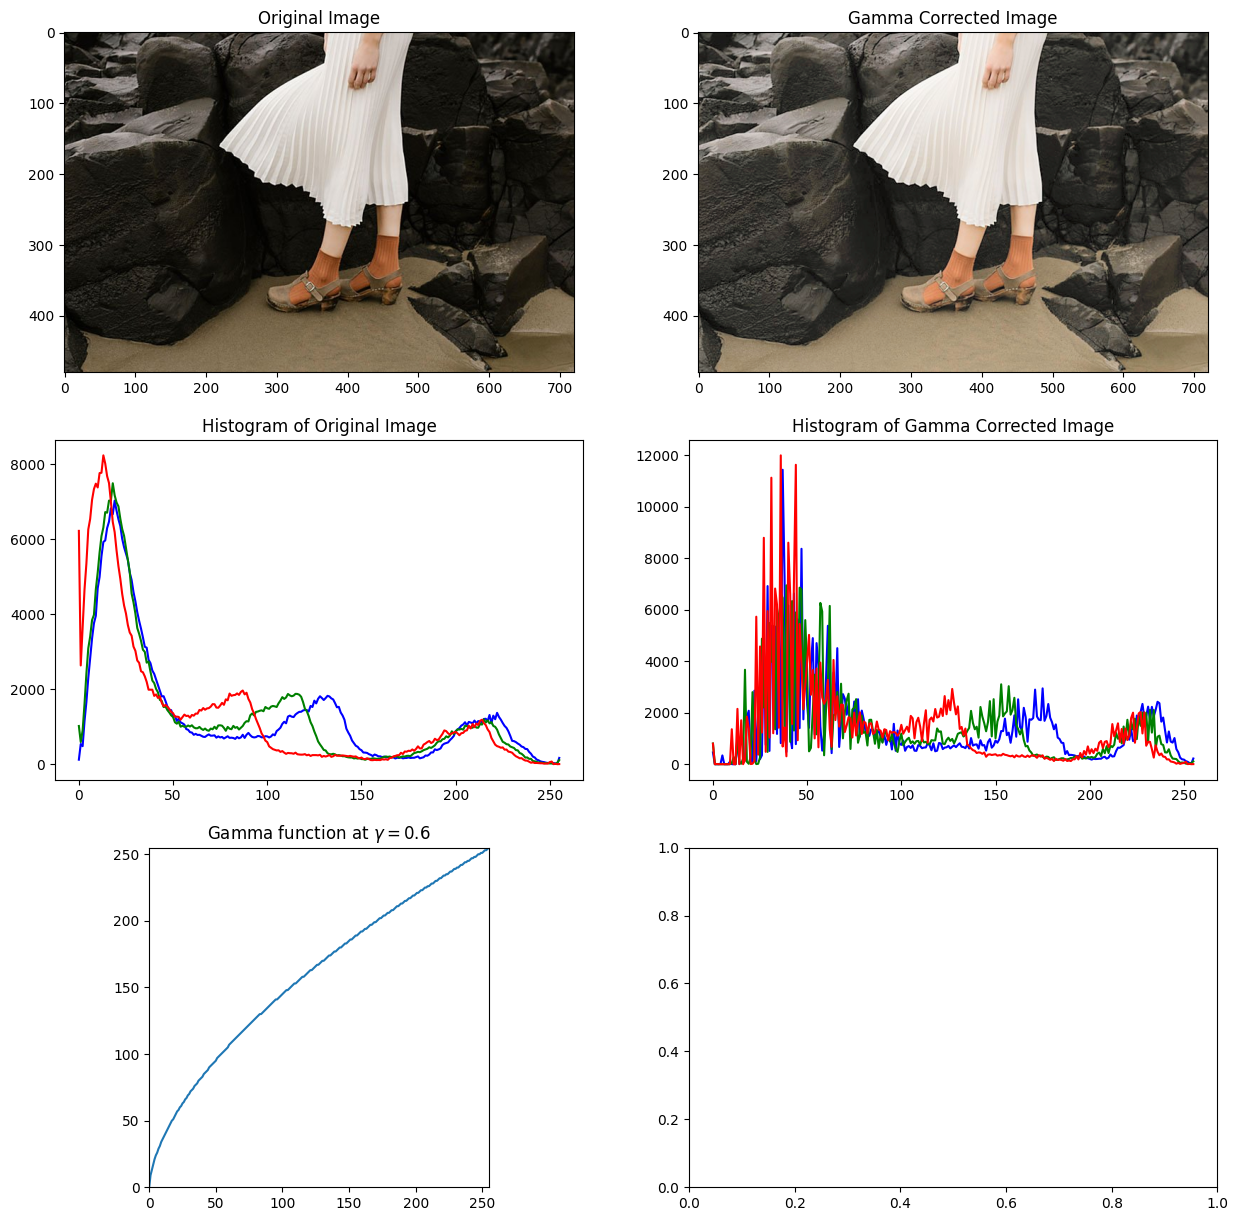

In [56]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)
gamma = 0.6
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')

img_p = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l_img, a_img, b_img = cv.split(img_p)
l_updated = cv.LUT(l_img, table)
img_gamma = cv.merge((l_updated,a_img,b_img))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3, 2, figsize=(15,15))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[1, 0].set_title('Histogram of Original Image')
axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 0].set_title('Gamma function at $\gamma = {g}$'.format(g=gamma))

plt.show()


Question 4

Value of a is  0.5


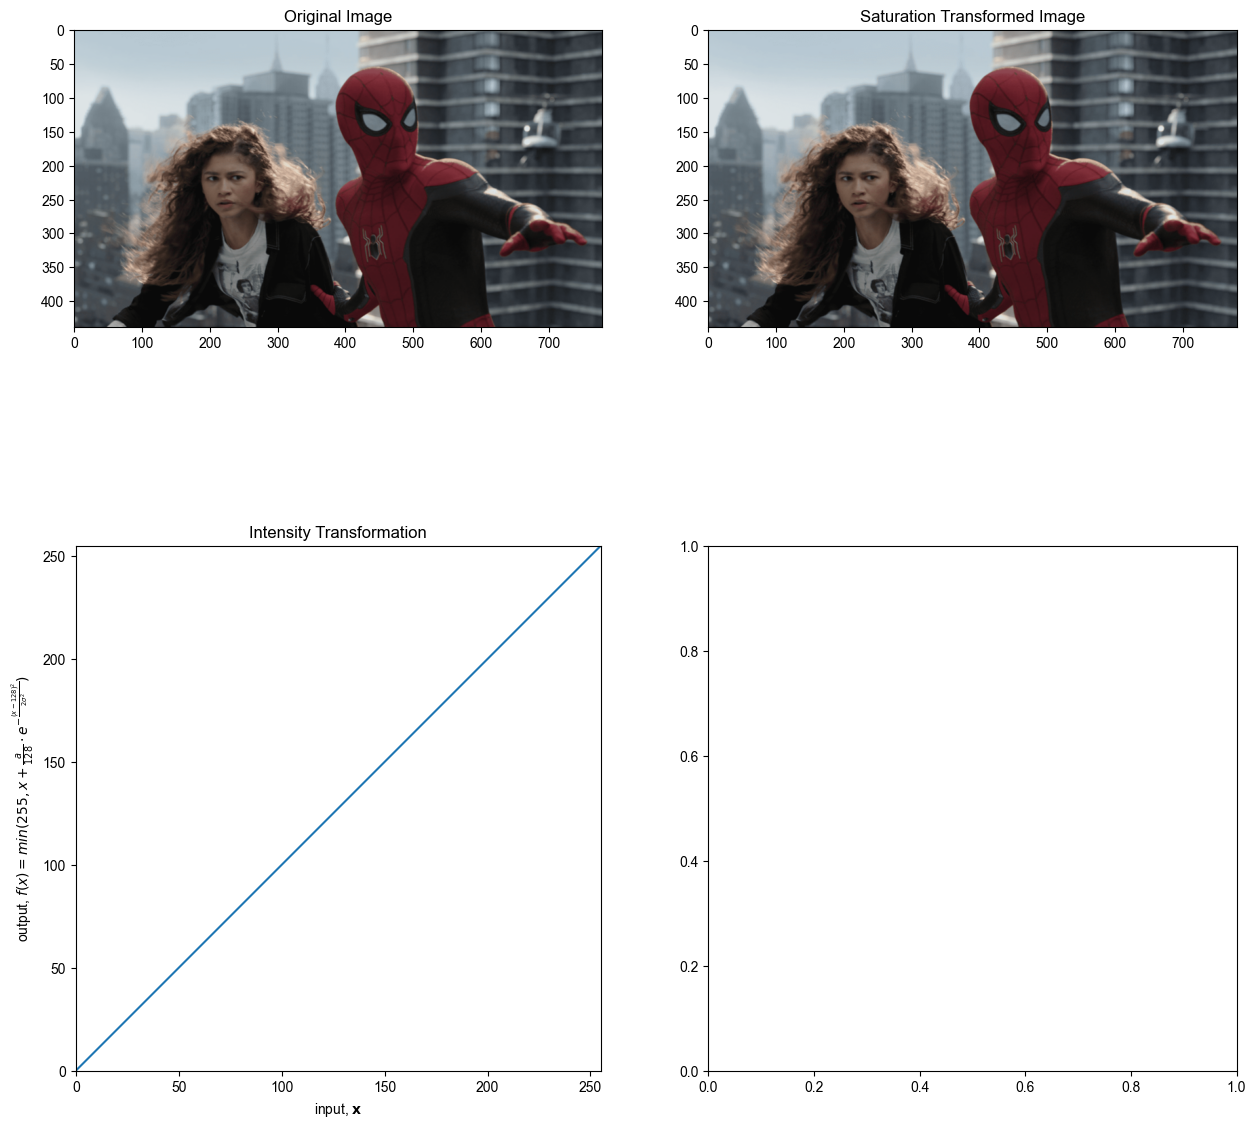

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math



img_orig = cv.imread('../spider.png', cv.IMREAD_COLOR)
sigma = 70
a = 0.5
def fn(x):
    return int(min(255,x+(a/128)*np.exp(-((x-128)**2)/(2*(sigma**2)))))
img_o = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_cvt = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img_cvt)

#print(s_img)

for i in range(len(s_img)):
    for j in range(len(s_img[0])):
        s_img[i][j] = fn(s_img[i][j])

img_edited = cv.merge((h_img, s_img, v_img))
img = cv.cvtColor(img_edited, cv.COLOR_HSV2RGB)

print('Value of a is ',a)

f, axarr = plt.subplots(2, 2, figsize=(15,15))
axarr[0, 0].imshow(img_o)
axarr[0, 1].imshow(img)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Saturation Transformed Image')

table = np.array([fn(i) for i in np.arange(0, 256)]).astype('uint8')
#print(fn(100))

axarr[1, 0].set_title('Intensity Transformation')
#axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[1, 0].plot(table)
axarr[1, 0].set_xlim(0, 255)
axarr[1, 0].set_ylim(0, 255)
axarr[1, 0].set_aspect('equal')
axarr[1, 0].set_xlabel('input, $\mathbf{x}$')
axarr[1, 0].set_ylabel(r'output, $f(x) = min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')
#ax.set_title(r'$f(x) = \min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')

plt.show()


In [10]:
import numpy as np

sigma = 70
a = 0.5

def fn(x):
    return float((a/128) * np.exp(-((x - 128)**2) / (2 * (sigma**2))))

input_value = 58
output = fn(input_value)
print(output)


0.0023692603895024743


Question 5